# On-Center and Off-Center Ganglion Cells- Simple Receptor Field

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import math
import numpy as np
from numpy import asarray

## Import Image and Convert to Array

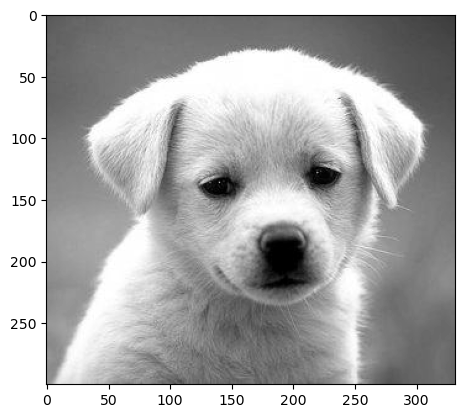

The shape of the image is: (300, 332)
The shape of the output is: 292 by 323


In [5]:
im = Image.open("dogg.jpg")
# im.thumbnail((256, 256))
im = im.convert("L")
jello = plt.imshow(im,cmap = 'gray')
plt.show()

data = asarray(im)
print("The shape of the image is: " + str(data.shape))
print("The shape of the output is: " + str(int((data.shape[0]-9)+ 1)) + " by " + str(int((data.shape[1]-9))))


Note: the out put is based on a filter that is 9 x 9

## Create W receptor field

In this model there is only one filter. This filter is W, there is no bias vector. 

This filter was based off of on-center and off-center ganglion cells. Like this one:

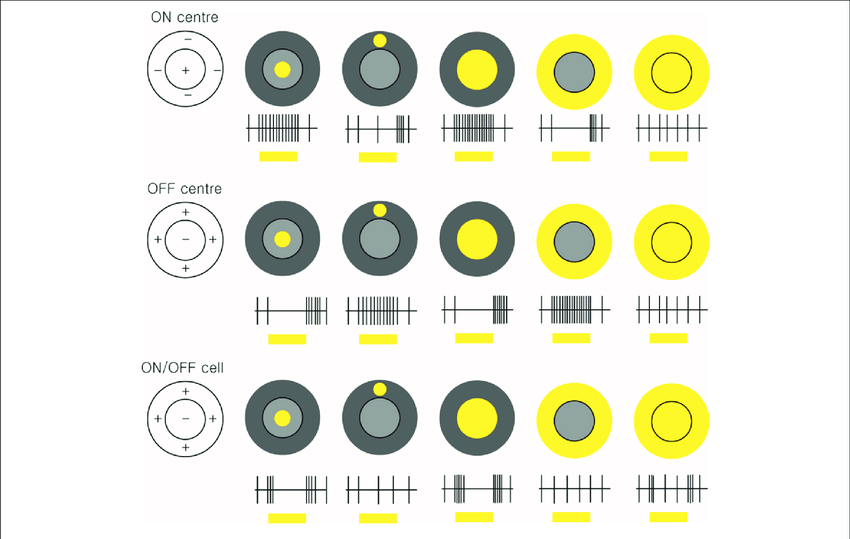

from : DOI:10.3389/fneur.2021.661938

I have made sure that when the whole receptor is illuminated the net is positive for both the on and off center receptive field.

## On center receptive field

If everything is illuminated: -40 x 56 + 100 x 25 = 260

In [6]:
W = np.zeros((5,5)) + 100
W_1 = np.pad(W, ((2,2),(2,2)), mode='constant', constant_values = (-40,-40))
print(W_1)

[[-40. -40. -40. -40. -40. -40. -40. -40. -40.]
 [-40. -40. -40. -40. -40. -40. -40. -40. -40.]
 [-40. -40. 100. 100. 100. 100. 100. -40. -40.]
 [-40. -40. 100. 100. 100. 100. 100. -40. -40.]
 [-40. -40. 100. 100. 100. 100. 100. -40. -40.]
 [-40. -40. 100. 100. 100. 100. 100. -40. -40.]
 [-40. -40. 100. 100. 100. 100. 100. -40. -40.]
 [-40. -40. -40. -40. -40. -40. -40. -40. -40.]
 [-40. -40. -40. -40. -40. -40. -40. -40. -40.]]


## Off center receptive field

If everything is illuminated: 50 x 56 + -100 x 25 = 300

In [7]:
W = np.zeros((5,5)) + -100
W_2 = np.pad(W, ((2,2),(2,2)), mode='constant', constant_values = (50,50))
print(W_2)

[[  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]]


## Perform One Step Convolution

In [8]:
(n_H_old, n_W_old) = data.shape

f = 9

n_H = int((n_H_old-f) + 1)
n_W = int((n_W_old-f)+ 1)

Z = np.zeros((n_H,n_W))

W = [W_1,W_2]

for h in range(n_H):
    vert_start = h
    vert_end = vert_start + f
    i = 0
    for w in range(n_W):
        horiz_start = w
        horiz_end = horiz_start + f
        slice_of_data = data[vert_start:vert_end, horiz_start:horiz_end]
        if i%2 == 0:
            s = slice_of_data * W_1
            number = np.sum(s)/81
        else:
            s = slice_of_data * W_2
            number = np.sum(s)/81
        i += 1
            
            
        Z[h][w] = number




In [9]:
(n_H_old, n_W_old) = data.shape

f = 9

n_H = int((n_H_old-f) + 1)
n_W = int((n_W_old-f)+ 1)

Z_1 = np.zeros((n_H,n_W))

W = [W_1,W_2]

for h in range(n_H):
    vert_start = h
    vert_end = vert_start + f
    i = 0
    for w in range(n_W):
        horiz_start = w
        horiz_end = horiz_start + f
        slice_of_data = data[vert_start:vert_end, horiz_start:horiz_end]
        if i%2 == 0:
            s = slice_of_data * W_1
            number = np.sum(s)/81
        else:
            s = slice_of_data * W_1
            number = np.sum(s)/81
        i += 1
            
            
        Z_1[h][w] = number

        


In [10]:
(n_H_old, n_W_old) = data.shape

f = 9

n_H = int((n_H_old-f) + 1)
n_W = int((n_W_old-f)+ 1)

Z_2 = np.zeros((n_H,n_W))

W = [W_1,W_2]

for h in range(n_H):
    vert_start = h
    vert_end = vert_start + f
    i = 0
    for w in range(n_W):
        horiz_start = w
        horiz_end = horiz_start + f
        slice_of_data = data[vert_start:vert_end, horiz_start:horiz_end]
        if i%2 == 0:
            s = slice_of_data * W_2
            number = np.sum(s)/81
        else:
            s = slice_of_data * W_2
            number = np.sum(s)/81
        i += 1
            
            
        Z_2[h][w] = number
        

## Convert new array to image

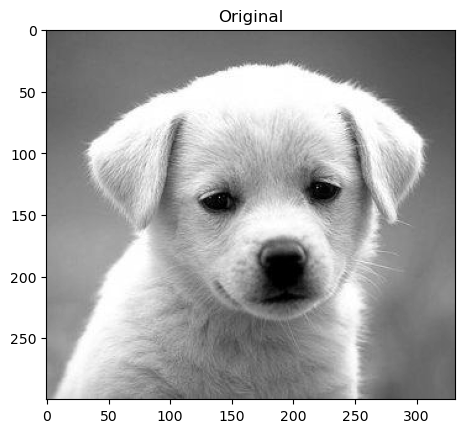

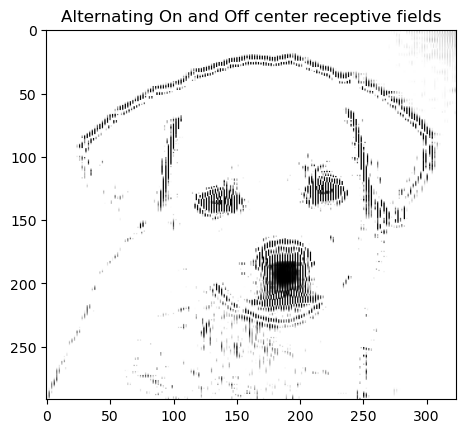

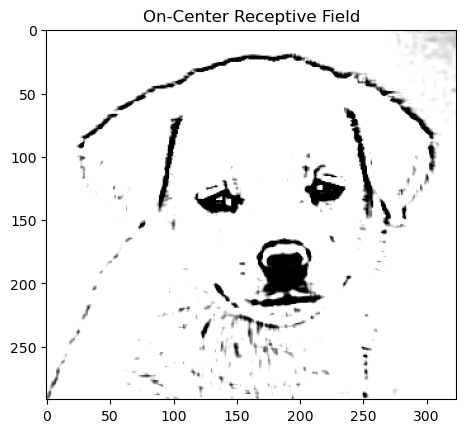

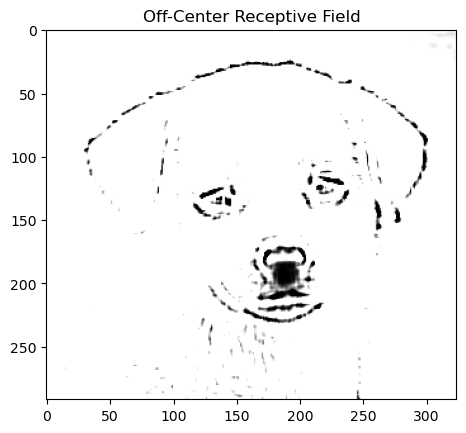

In [11]:
the  = Image.fromarray(data)
jello = plt.imshow(the,cmap='gray')
plt.title("Original")
plt.show()

new  = Image.fromarray(Z)
jello = plt.imshow(new)
plt.title("Alternating On and Off center receptive fields")
plt.show()

new  = Image.fromarray(Z_1)
jello = plt.imshow(new)
plt.title("On-Center Receptive Field")
plt.show()


new  = Image.fromarray(Z_2)
jello = plt.imshow(new)
plt.title("Off-Center Receptive Field")
plt.show()


